In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r"C:\Users\conno\workspace\projects\Diamond_Price_Prediction\Resources\diamonds.csv")

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
# Select only columns with numerical data types
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical data
corr_matrix = numerical_data.corr()



## Functions

In [11]:
# Creating a heatmap function for future use
def corr_heatmap(corr_matrix):
    """"Convient way to initiate a detailed correlation matrix"""


    plt.figure(figsize=(14,12))
    sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                cmap='seismic',
                cbar=True,
                square=True,
                center=0)
    plt.show()
   


In [12]:
def train_model(X, y):
    """Input 'X' and 'y' to build and train model"""

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

# Notes about data set
### Three C's
- Cut
- Color
- Clarity
### Other important metrics
- Depth
- Table: top part or flato part
- Price (Target Variable): self explanitor
- x, y, z (Stone Deminsions) **high correlation**
    - 

### It is usually reccomended to drop highly correlated columns / features due
- Think of the correlation between Sales volume & Units volume

In [13]:
df = data

df['xy'] = df['x']/df['y'] # This creates 7 rows of NaN values that will need to be dropped
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,xy
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [14]:
# Encode categorical variables into machine readable values
d_df = pd.get_dummies(data=data)

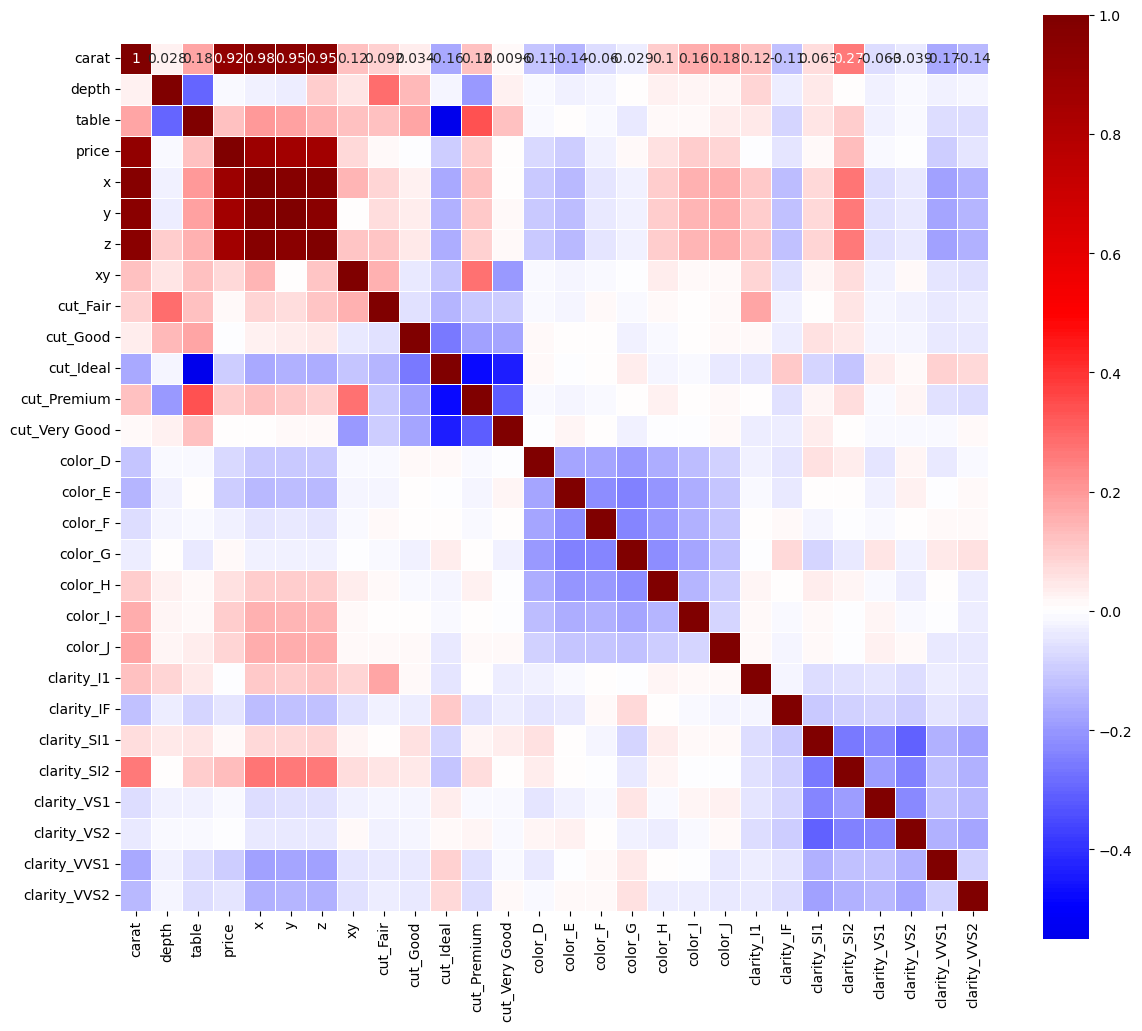

In [15]:
corr_heatmap(d_df.corr())

In [16]:
d_df.head() # True & False = 1 & 0

,carat,depth,table,price,x,y,z,xy,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.992462,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1.013021,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.995086,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.992908,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.997701,False,True,...,False,True,False,False,False,True,False,False,False,False


In [17]:
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   xy             53933 non-null  float64
 8   cut_Fair       53940 non-null  bool   
 9   cut_Good       53940 non-null  bool   
 10  cut_Ideal      53940 non-null  bool   
 11  cut_Premium    53940 non-null  bool   
 12  cut_Very Good  53940 non-null  bool   
 13  color_D        53940 non-null  bool   
 14  color_E        53940 non-null  bool   
 15  color_F        53940 non-null  bool   
 16  color_G        53940 non-null  bool   
 17  color_H        53940 non-null  bool   
 18  color_

In [18]:
d_df = d_df.dropna(axis=1)
d_df.isna().sum()

carat            0
depth            0
table            0
price            0
x                0
y                0
z                0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

In [19]:
X = d_df.drop(['price', 'x', 'y', 'z'], axis=1) # Dropping target variable & highly correlated columns
y = d_df['price'] # Target variable

In [20]:
X_train, X_test, y_train, y_test = train_model(X, y)

In [21]:
# 'Scaler' is a sklearn preproscessing module that normalizes the features of our data.
# 'Normalization' in this context means ajusting the features so that they have a mean of '0' and standard deviation of 1
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test) 

In [23]:
# Calculating a baseline
ypred_null = y_train.mean()

## K-Neighbours Regressor

In [41]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [25]:
y_pred = knn.predict(X_test_scaled)

## Random Forrest Regression

In [26]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10)

In [27]:
y_pred2 = rf.predict(X_test_scaled)

## Linear Regression

In [28]:
lin = LinearRegression()
lin = lin.fit(X_train_scaled, y_train)

In [31]:
y_pred3 = lin.predict(X_test_scaled)

## Lasso Regression

In [29]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [30]:
y_pred4 = lasso.predict(X_test_scaled)

In [42]:
# Creating a data frame to hold results
models_eval = pd.DataFrame(index=['KNN', 'MLR'], columns=['RMSE'])

models_eval.loc['KNN', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred))
models_eval.loc['RF', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred2))
models_eval.loc['MLR', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred3))
models_eval.loc['Lasso', 'RMSE'] = np.sqrt(mean_squared_error(y_test, y_pred4))
models_eval.loc['Null', 'RMSE'] = ypred_null

In [44]:
models_eval

,RMSE
KNN,1041.287547
MLR,1159.808626
RF,587.537142
Lasso,1159.52794
Null,3939.490707
